In [1]:
#重新引入包
%reload_ext autoreload
%autoreload 2

In [16]:
#导入模块
from mergeutils.Coding import Get_trainsample,factorsort,create_canvas
from mergeutils.Image_preprocessing import getRasterizeOptions,align
from mergeutils.bayes import bayes_RandomForest
from mergeutils.Init import set_proj
from mergeutils.Get_predmodel import *
from mergeutils.Figure import DisplayAndSave_Figue,plot_feature_importances
import h5py
import pandas as pd

In [3]:
# 获取文件名
files=[
    'building.tif',
    'diceng.tif',
    'gongcheng.tif',
    'guidao.tif',
    'jiangyu.tif',
    'river.tif',
    'roads.tif',
    'shuiwen.tif',
    ]

inputdir='./raster/'
outdir='./aligntiff/'
resfile='./raster/diceng.tif'

In [4]:
# 获取投影信息
options=getRasterizeOptions(resfile)

In [5]:
#设置投影库(兼容性设置)
set_proj()

In [6]:
#进行栅格对齐
align(files,inputdir,outdir,options)

In [18]:
#得到样本集(包括滑坡点，非滑坡点)
outdir='./中间结果/'
inputdir='./aligntiff/'
featuredir='./shp/'
featurename='propoints'
train_sample,sample=Get_trainsample(inputdir,files,featuredir,featurename,outdir,options,100,'equal')

Get_trainsample
get_sample
滑坡点个数为 954
266634
40324106
overlay
overlay
getposition
954
getposition
40324106
merge
(954, 9)
9
merge
(40324106, 9)
9
start Sample


In [21]:
factorname=[]
for i in files:
    factorname.append(i[:-4])
columnsname=['x','y']
columnsname=columnsname+factorname
columnsname.append('lable')    

In [22]:
import pandas as pd
facor=pd.DataFrame(train_sample[0])
lable=pd.DataFrame(train_sample[1])
all=pd.concat([facor,lable], axis=1) 
all=pd.DataFrame(all)
all.columns=columnsname

In [23]:
all

,x,y,building,diceng,gongcheng,guidao,jiangyu,points,river,roads,shuiwen,lable
0,490.0,7363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2345.0,1950.0,1.0,6.0,4.0,4.0,4.0,0.0,6.0,3.0,3.0,0.0
2,3703.0,1650.0,6.0,3.0,6.0,1.0,4.0,0.0,6.0,2.0,2.0,0.0
3,485.0,5394.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4004.0,7537.0,1.0,4.0,4.0,7.0,5.0,0.0,5.0,7.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10489,2202.0,8060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10490,353.0,4839.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10491,371.0,7454.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10492,967.0,5682.0,7.0,3.0,2.0,6.0,6.0,0.0,4.0,1.0,2.0,0.0


0.9880551352862714


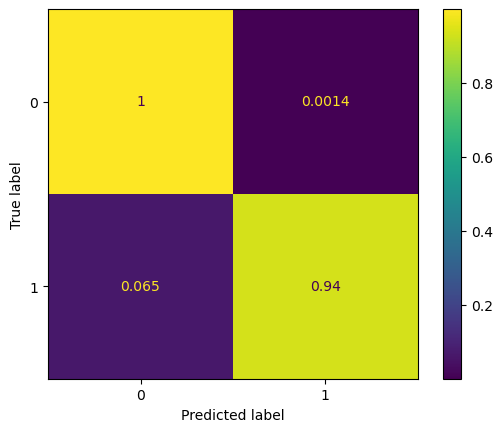

[[1.   0.  ]
 [0.01 0.99]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.02 0.98]
 [1.   0.  ]]


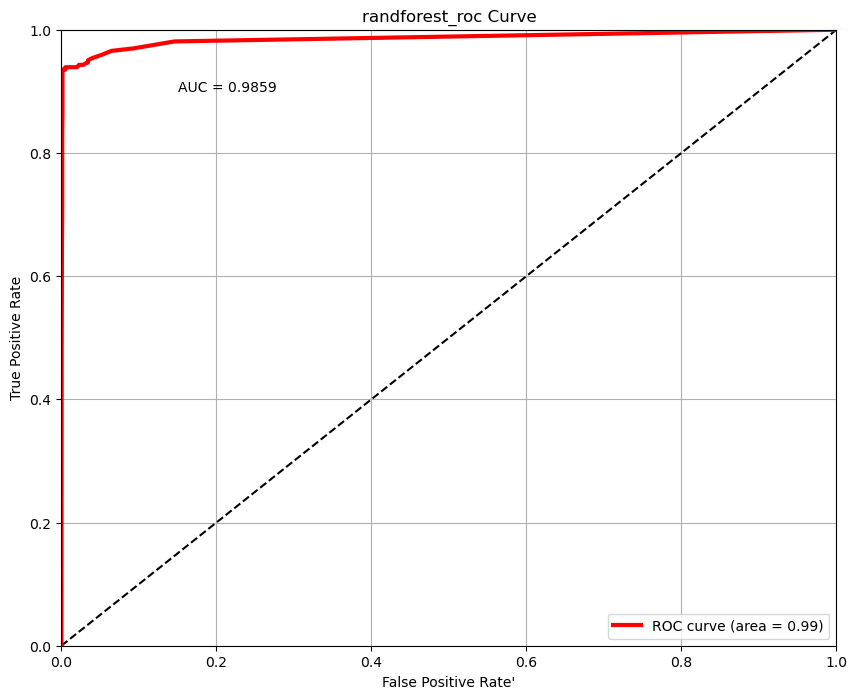

In [24]:
#随机森林
original_model=Machine_Learning.RandomForest(train_sample,0.7,'./results/Randforest_original_model.pkl',None)

In [12]:
#获取画布
inputdir='./aligntiff/'
canvas=create_canvas(inputdir,files,options)

overlay
getposition
18816501


In [13]:
#从canvas矩阵中提取出位置和特征标签
canvas_position=canvas[:,:2]
canvas_features=canvas[:,2:]
Minmaxscaler_canvasfeatures=Minmaxscaler(canvas_features)

In [14]:
original_randomforest_pred_canvas=original_model.predict_proba(canvas_features)

KeyboardInterrupt: 

In [ ]:
original_canvaspred=DisplayAndSave_Figue(original_randomforest_pred_canvas,canvas_position,options,'./results/original_randomfores_pred.tiff')

0
(4570, 8882)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
successfully convert array to raster
